In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import os
import re
import scipy.ndimage
import random

In [2]:
%matplotlib inline

In [7]:
files = os.listdir('data')
names = []
for i in files:
    m = re.search('.*json', i)
    if (m <> None) and (i <> 'data.json'):
        names.append('data/'+i)

In [4]:
def ED(line1, line2):
    return np.sqrt(np.sum((line1[0]-line2[0])**2)+np.sum((line1[1]-line2[1])**2))

1  -  147.437156758
2  -  82.5828311377
3  -  18.0172724424
4  -  18.1563563785
1  -  39.9869699344
2  -  28.4235468851
3  -  47.9785296209
4  -  66.4495135413


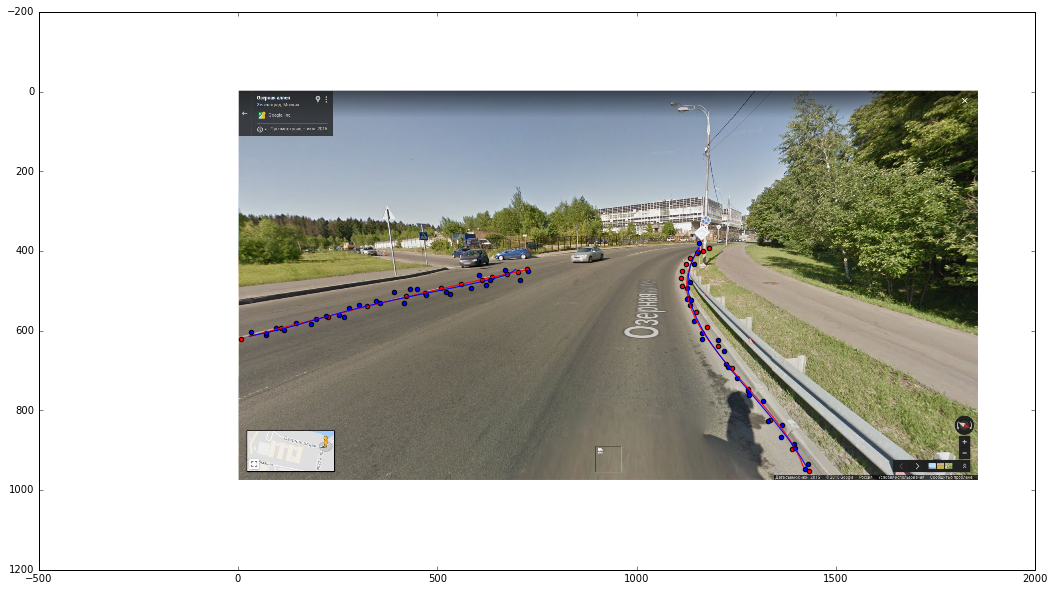

1  -  166.4660158
2  -  84.0994707119
3  -  22.1075970674
4  -  26.7639923741
1  -  150.988253525
2  -  52.9272877071
3  -  34.0089241423
4  -  33.271762344


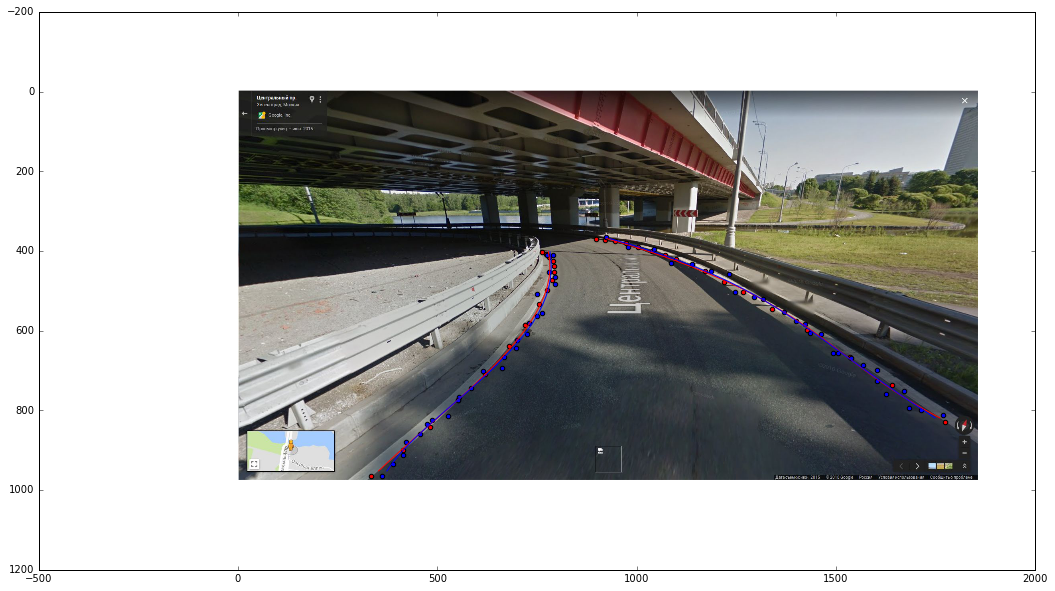

1  -  11.4442300144
2  -  13.7851714327
3  -  15.1670324549
4  -  21.8953600893
1  -  35.2321246059
2  -  37.6264533276
3  -  39.1174417091
4  -  40.4566360322
1  -  13.9934037728
2  -  20.9200321308
3  -  23.6727657999
4  -  26.1580775402
1  -  79.1647644876
2  -  78.8850977667
3  -  92.5579953903
4  -  90.2841020167


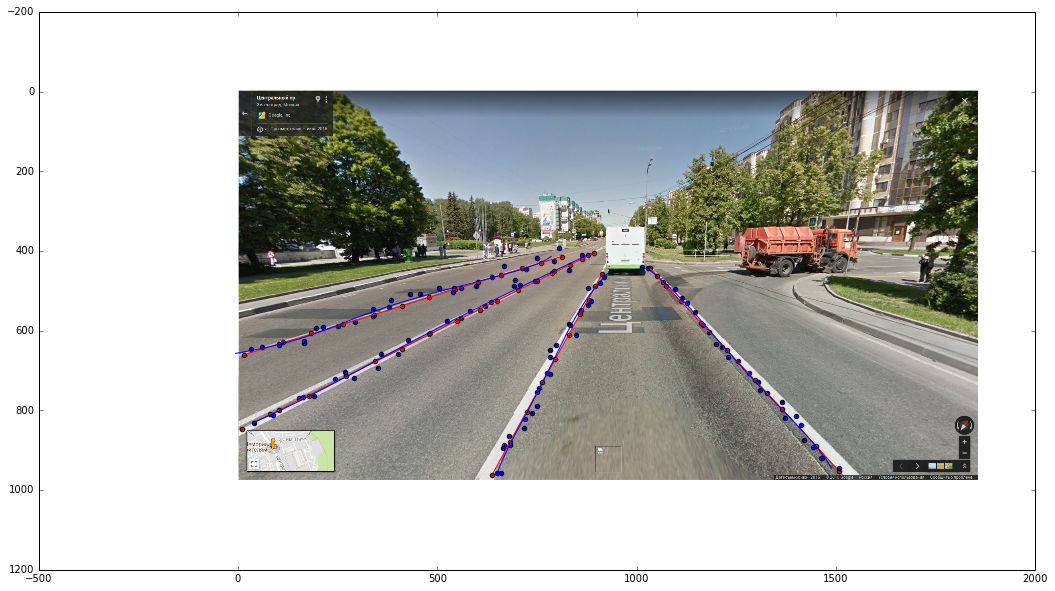

1  -  43.6882974159
2  -  33.4453893812
3  -  33.1000753627
4  -  36.6141526938
1  -  56.6552235908
2  -  33.9157756448
3  -  7.19637322739
4  -  8.01965485709
1  -  76.4464420584
2  -  55.2398041165
3  -  34.7658838808
4  -  34.7450396138
1  -  64.6113675275
2  -  46.512317888
3  -  29.3036009573
4  -  38.5184226923


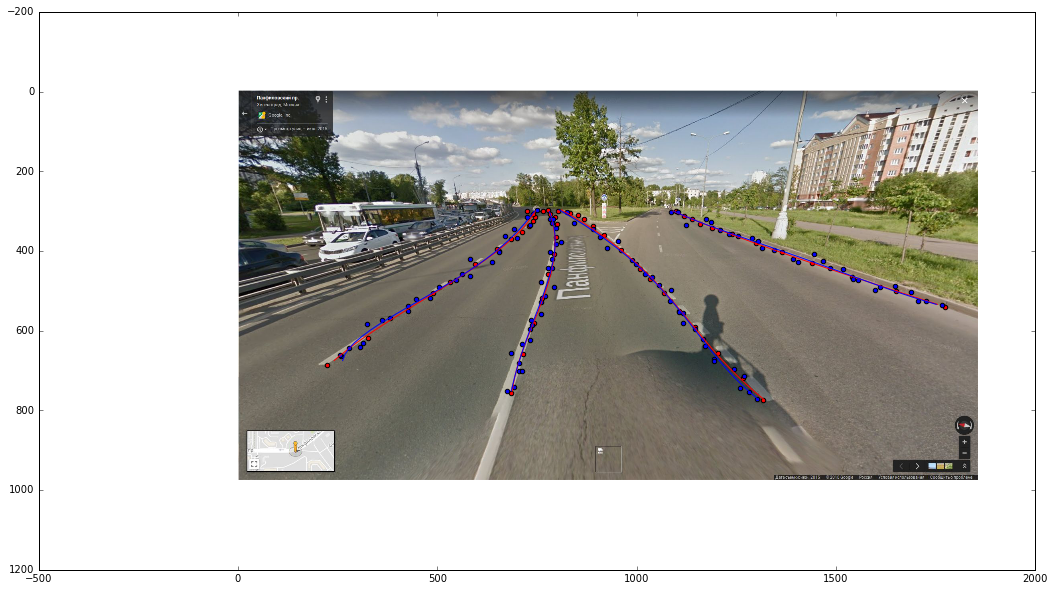

1  -  45.4909522442
2  -  40.7899597405
3  -  24.8159731787
4  -  36.2614073951
1  -  52.3675602728
2  -  30.3267673329
3  -  34.864269998
4  -  35.0937722148
1  -  127.516712202
2  -  90.0079689713
3  -  23.5817666244
4  -  29.0358437478


KeyboardInterrupt: 

In [8]:
SIGMA = 10
coef = []
coef_noise = []
for name in names:
    data = json.load(open(name))
    X = dict()
    X_noise = dict()
    points = data[data.keys()[0]]['regions']
    for pointKey in points.keys():
        line = points[pointKey]['region_attributes']['line']
        pointCoord = points[pointKey]['shape_attributes']
        if (line not in X):
            X[line] = []
            X_noise[line] = []
        X[line].append([pointCoord['cx'], pointCoord['cy']])
    
    image = scipy.ndimage.imread(name[:-5]+'.jpeg')
    plt.figure(figsize = (25, 10))
    plt.imshow(image)

    for key in X:
        line = np.array(X[key])
        plt.scatter(line[:,0], line[:,1], c='r')
        
        coef_loc = []
        for i in range(1, 4):
            c = np.polyfit(line[:,1], line[:,0], i, full=True)
            #print 'Коэффициенты: ', c[0] 
            coef_loc.extend(c[0])
        coef.append(coef_loc)
        
        start = int(min(line[:,1]))
        stop = int(max(line[:,1]))
        x = np.array(range(start, stop, (stop-start)/25))
        y1 = np.zeros(x.size)
        for j in range(i+1):
            y1 += c[0][j] * x**(i-j)
        plt.plot(y1, x, c='r')
        
        line_noise = [[random.gauss(coordX, SIGMA), random.gauss(coordY, SIGMA)] for coordX, coordY in zip(y1, x)]
        line_noise = np.array(line_noise)
        plt.scatter(line_noise[:,0], line_noise[:,1], c='b')
        
        coef_loc = []
        for i in range(1, 5):
            c = np.polyfit(line_noise[:,1], line_noise[:,0], i, full=True)
            
            y2 = np.zeros(x.size)
            for j in range(i+1):
                y2 += c[0][j] * x**(i-j)
            print i, " - ", ED((x,y1),(x,y2))
            
            #print 'Коэффициенты: ', c[0] 
            coef_loc.extend(c[0])
        coef_noise.append(coef_loc)
        
        y2 = np.zeros(x.size)
        for j in range(i+1):
            y2 += c[0][j] * x**(i-j)
        plt.plot(y2, x, c='b')

    plt.show()

coef = np.array(coef)
coef_noise = np.array(coef_noise)
for i in range(9):
    plt.figure(figsize = (10, 5))
    plt.hist(coef_noise[:,i], bins=50, color='b')
    plt.hist(coef[:,i], bins=50, color='r')
    plt.show()